In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [2]:
env='Hopper-v2'

In [3]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [4]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(1259, 17)


In [5]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(1250, 17)


In [6]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,02-05-2023 18:59:55,200,0,200,0.009941,28,7,False,3.913226,3.913226,3.913226,3.913226,3.913226,COMPER
1,1,2,Hopper-v2,02-05-2023 19:10:24,400,0,400,0.019882,44,19,False,2.534707,3.223967,3.223967,3.223967,3.223967,COMPER
2,1,3,Hopper-v2,02-05-2023 19:19:54,600,0,600,0.029822,55,2,False,0.995459,2.481131,2.481131,2.481131,2.481131,COMPER
3,1,4,Hopper-v2,02-05-2023 19:29:36,800,0,800,0.039763,64,5,False,4.006844,2.862559,2.862559,2.862559,2.862559,COMPER
4,1,5,Hopper-v2,02-05-2023 19:39:34,1000,0,1000,0.049704,74,3,False,2.056080,2.701263,2.701263,2.701263,2.701263,COMPER
5,1,6,Hopper-v2,02-05-2023 19:49:16,1200,0,1200,0.059645,84,6,False,4.883171,3.064915,3.064915,3.064915,3.064915,COMPER
6,1,7,Hopper-v2,02-05-2023 19:58:44,1400,0,1400,0.069586,93,2,False,1.027285,2.773825,2.773825,2.773825,2.773825,COMPER
7,1,8,Hopper-v2,02-05-2023 20:08:28,1600,0,1600,0.079526,103,7,False,5.591763,3.126067,3.126067,3.126067,3.126067,COMPER
8,1,9,Hopper-v2,02-05-2023 20:17:41,1800,0,1800,0.089467,113,11,False,8.450878,3.717713,3.717713,3.717713,3.717713,COMPER
9,1,10,Hopper-v2,02-05-2023 20:27:19,2000,0,2000,0.099408,122,5,False,4.093761,3.755318,3.755318,3.755318,3.755318,COMPER


In [7]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,10-05-2023 13:47:02,200,201,0,0.009941,12,8,False,7.906550,7.906550,7.906550,7.906550,7.906550,DDPG
1,1,2,Hopper-v2,10-05-2023 13:47:11,400,401,0,0.019882,21,8,False,7.567233,7.736892,7.736892,7.736892,7.736892,DDPG
2,1,3,Hopper-v2,10-05-2023 13:47:19,600,601,0,0.029822,30,3,False,2.142652,5.872145,5.872145,5.872145,5.872145,DDPG
3,1,4,Hopper-v2,10-05-2023 13:47:26,800,801,0,0.039763,39,6,False,5.386739,5.750793,5.750793,5.750793,5.750793,DDPG
4,1,5,Hopper-v2,10-05-2023 13:47:34,1000,1001,0,0.049704,48,6,False,5.403340,5.681303,5.681303,5.681303,5.681303,DDPG
5,1,6,Hopper-v2,10-05-2023 13:47:42,1200,1201,0,0.059645,57,7,False,6.478266,5.814130,5.814130,5.814130,5.814130,DDPG
6,1,7,Hopper-v2,10-05-2023 13:47:50,1400,1401,0,0.069586,66,6,False,5.392561,5.753906,5.753906,5.753906,5.753906,DDPG
7,1,8,Hopper-v2,10-05-2023 13:47:58,1600,1601,0,0.079526,75,3,False,2.078143,5.294436,5.294436,5.294436,5.294436,DDPG
8,1,9,Hopper-v2,10-05-2023 13:48:05,1800,1801,0,0.089467,83,25,True,41.929106,9.364954,9.364954,9.364954,9.364954,DDPG
9,1,10,Hopper-v2,10-05-2023 13:48:13,2000,2001,0,0.099408,92,22,False,37.040848,12.132544,12.132544,12.132544,12.132544,DDPG


In [8]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Hopper-v2,02-05-2023 18:59:55,200,0,200,0.009941,28,7,False,3.913226,3.913226,3.913226,3.913226,3.913226,COMPER
1,1,2,Hopper-v2,02-05-2023 19:10:24,400,0,400,0.019882,44,19,False,2.534707,3.223967,3.223967,3.223967,3.223967,COMPER
2,1,3,Hopper-v2,02-05-2023 19:19:54,600,0,600,0.029822,55,2,False,0.995459,2.481131,2.481131,2.481131,2.481131,COMPER
3,1,4,Hopper-v2,02-05-2023 19:29:36,800,0,800,0.039763,64,5,False,4.006844,2.862559,2.862559,2.862559,2.862559,COMPER
4,1,5,Hopper-v2,02-05-2023 19:39:34,1000,0,1000,0.049704,74,3,False,2.056080,2.701263,2.701263,2.701263,2.701263,COMPER


In [9]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
245,5,246,Hopper-v2,10-05-2023 17:46:42,49200,49201,0,0.999,4656,7,True,3.023658,13.660045,4.826381,2.608534,1.788714,DDPG
246,5,247,Hopper-v2,10-05-2023 17:46:58,49400,49401,0,0.999,4690,3,False,1.659986,13.611462,4.825422,2.582650,1.629023,DDPG
247,5,248,Hopper-v2,10-05-2023 17:47:14,49600,49601,0,0.999,4723,5,False,2.612476,13.567111,4.829258,2.588016,1.798980,DDPG
248,5,249,Hopper-v2,10-05-2023 17:47:30,49800,49801,0,0.999,4756,7,True,3.029835,13.524793,4.832037,2.613169,1.880609,DDPG
249,5,250,Hopper-v2,10-05-2023 17:47:46,50000,50001,0,0.999,4789,8,True,3.790843,13.485857,4.838414,2.620754,1.966846,DDPG


<Axes: xlabel='TotalItr', ylabel='AvgLast10Ep'>

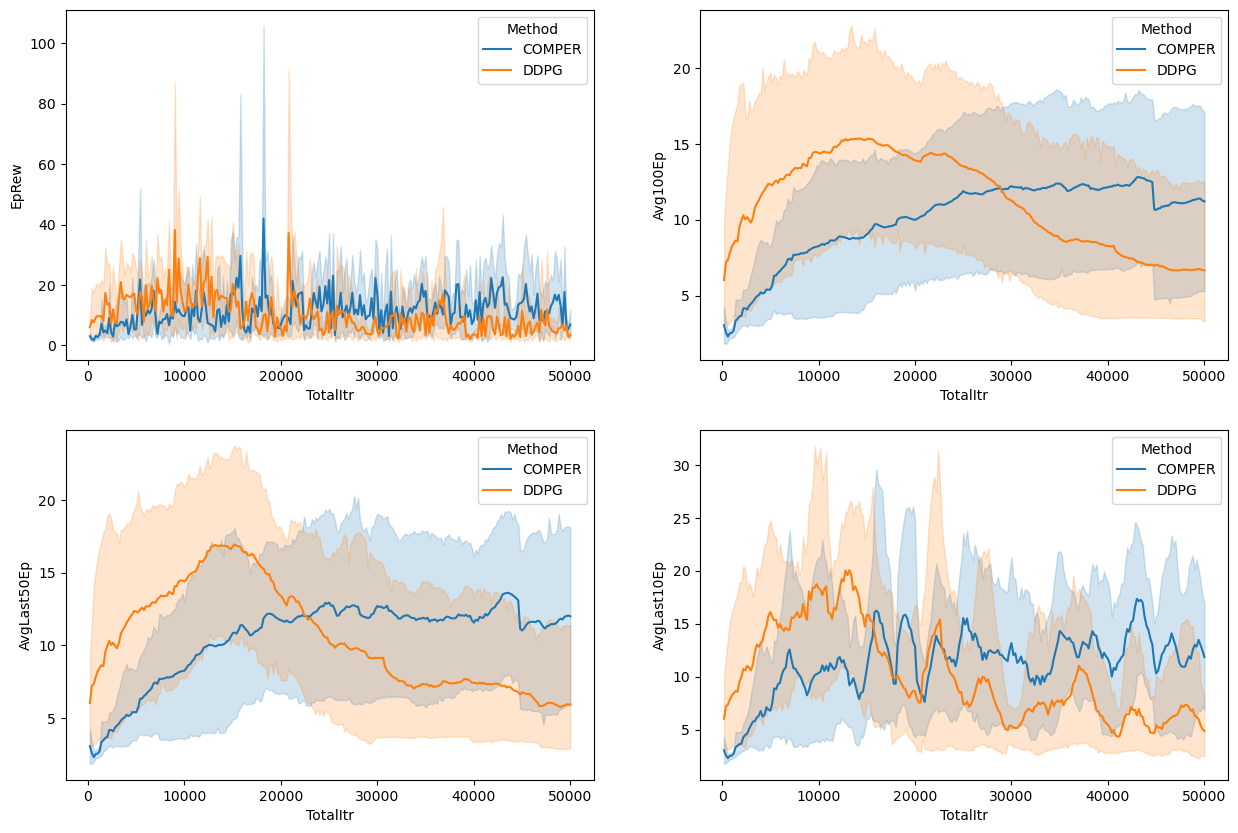

In [10]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

